In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import warnings
from time import time

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine as gg
import pymc3 as pm
import seaborn as sns

In [3]:
from src.io.cache_io import temp_dir
from src.io.data_io import DataFile
from src.loggers import set_console_handler_level
from src.managers.data_managers import CrisprScreenDataManager
from src.models.speclet_eight import SpecletEight
from src.plot.color_pal import SeabornColor
from src.plot.plotnine_helpers import set_gg_theme

In [4]:
notebook_tic = time()

warnings.simplefilter(action="ignore", category=UserWarning)
set_console_handler_level(logging.INFO)
set_gg_theme()
%config InlineBackend.figure_format = "retina"

RANDOM_SEED = 1026
np.random.seed(RANDOM_SEED)

In [5]:
from src.models.speclet_eight import SpecletEight

[10/15/21 14:34:17] INFO     Creating a new SpecletEight object.          ]8;id=58612;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:90

                    INFO     Adding new transformation.                  ]8;id=23677;file:///Users/admin/Lab_Projects/speclet/src/managers/data_managers.py\data_managers.py]8;;\:171

                    INFO     Adding new transformation.                  ]8;id=441337;file:///Users/admin/Lab_Projects/speclet/src/managers/data_managers.py\data_managers.py]8;;\:171

                    INFO     Adding new transformation.                  ]8;id=752429;file:///Users/admin/Lab_Projects/speclet/src/managers/data_managers.py\data_managers.py]8;;\:171

                    INFO     Calling `model_specification()` method.     ]8;id=972416;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_model.py\speclet_model.py]8;;\:205

                    INFO     Creating SpecletEight model.                ]8;id=799956;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:121

                    INFO     Getting data - reading from file.           ]8;id=177935;file:///Users/admin/Lab_Projects/speclet/src/managers/data_managers.py\data_managers.py]8;;\:126

                    WARNING  Dropping 0 sgRNA that map to multiple genes.     ]8;id=599924;file:///Users/admin/Lab_Projects/speclet/src/data_processing/achilles.py\achilles.py]8;;\:616

                    INFO     Adding 'rna_expr_gene_lineage' column. ]8;id=36759;file:///Users/admin/Lab_Projects/speclet/src/modeling/feature_engineering.py\feature_engineering.py]8;;\:73

[10/15/21 14:34:19] INFO     Number of data points: 1120                 ]8;id=536538;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:125

                    INFO     Number of sgRNA: 160                        ]8;id=137414;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:127

                    INFO     Number of genes: 101                        ]8;id=231486;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:128

                    INFO     Number of cell lines: 7                     ]8;id=702342;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:129

                    INFO     Number of lineages: 2                       ]8;id=281259;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:130

[10/15/21 14:34:20] INFO     Creating shared variables.                  ]8;id=26425;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_eight.py\speclet_eight.py]8;;\:133

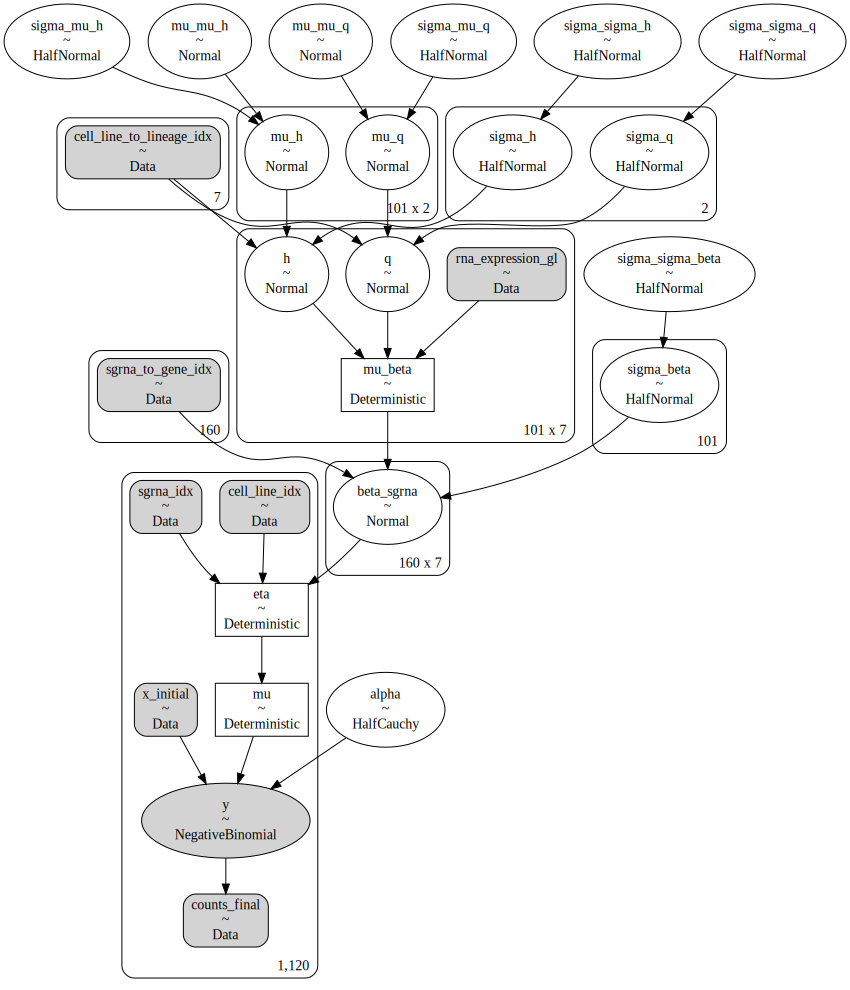

In [11]:
dm = CrisprScreenDataManager(DataFile.DEPMAP_CRC_BONE_SUBSAMPLE)
sp8 = SpecletEight("design-model", data_manager=dm, root_cache_dir=temp_dir())
sp8.build_model()
pm.model_to_graphviz(sp8.model)

In [12]:
sp8_mcmc_post = sp8.mcmc_sample_model(
    draws=1000,
    tune=500,
    chains=2,
    cores=2,
    target_accept=0.85,
    prior_pred_samples=-1,
    random_seed=RANDOM_SEED,
    ignore_cache=True,
    sample_kwargs={"init": "advi", "n_init": 20000},
)

[10/15/21 14:34:40] INFO     Beginning MCMC sampling.                    ]8;id=408274;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_model.py\speclet_model.py]8;;\:304

Auto-assigning NUTS sampler...
Initializing NUTS using advi...


Finished [100%]: Average Loss = 8,557.8
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, beta_sgrna, sigma_beta, sigma_sigma_beta, q, sigma_q, sigma_sigma_q, mu_q, sigma_mu_q, mu_mu_q, h, sigma_h, sigma_sigma_h, mu_h, sigma_mu_h, mu_mu_h]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 1849 seconds.
There were 351 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6390312835154116, but should be close to 0.85. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 27 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


[10/15/21 15:09:16] INFO     Not sampling from prior predictive.     ]8;id=680076;file:///Users/admin/Lab_Projects/speclet/src/modeling/pymc3_sampling_api.py\pymc3_sampling_api.py]8;;\:92

                    INFO     Finished MCMC sampling - caching results.   ]8;id=923528;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_model.py\speclet_model.py]8;;\:315

                    INFO     Caching InferenceData to '/Users/admin/Lab_ ]8;id=857583;file:///Users/admin/Lab_Projects/speclet/src/managers/cache_managers.py\cache_managers.py]8;;\:94
                             Projects/speclet/temp/design-model/mcmc/inf                     
                             erence-data.nc'.

In [13]:
sp8_vars: list[str] = [
    "mu_mu_h",
    "sigma_mu_h",
    "mu_h",
    "sigma_sigma_h",
    "sigma_h",
    "h",
    "mu_mu_q",
    "sigma_mu_q",
    "mu_q",
    "sigma_sigma_q",
    "sigma_q",
    "q",
    "mu_beta",
    "sigma_sigma_beta",
    "sigma_beta",
    "beta_sgrna",
    "alpha",
]

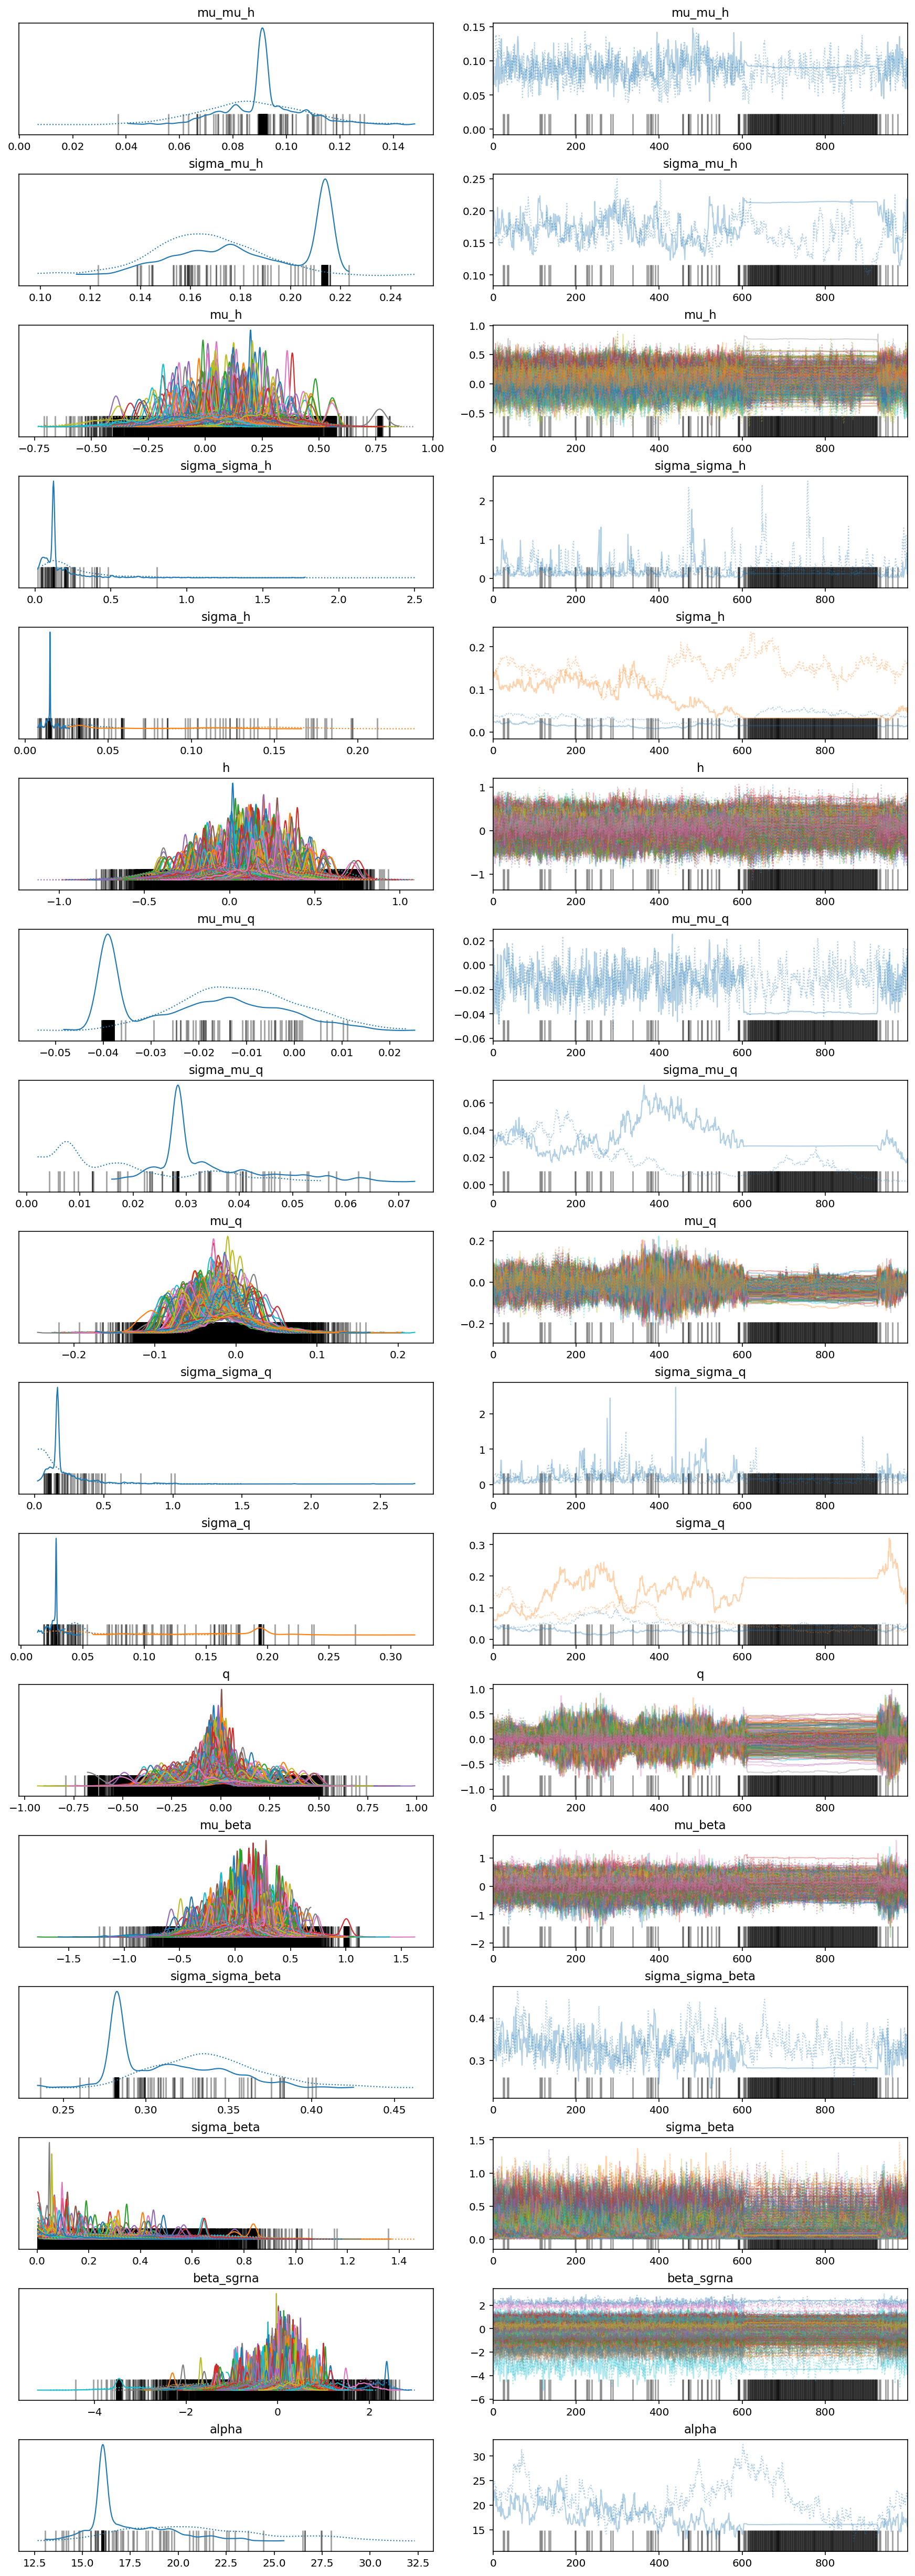

In [14]:
az.plot_trace(sp8_mcmc_post, var_names=sp8_vars);

In [28]:
# az.summary(sp8_mcmc_post, var_names=sp8_vars).query("r_hat > 1.1")

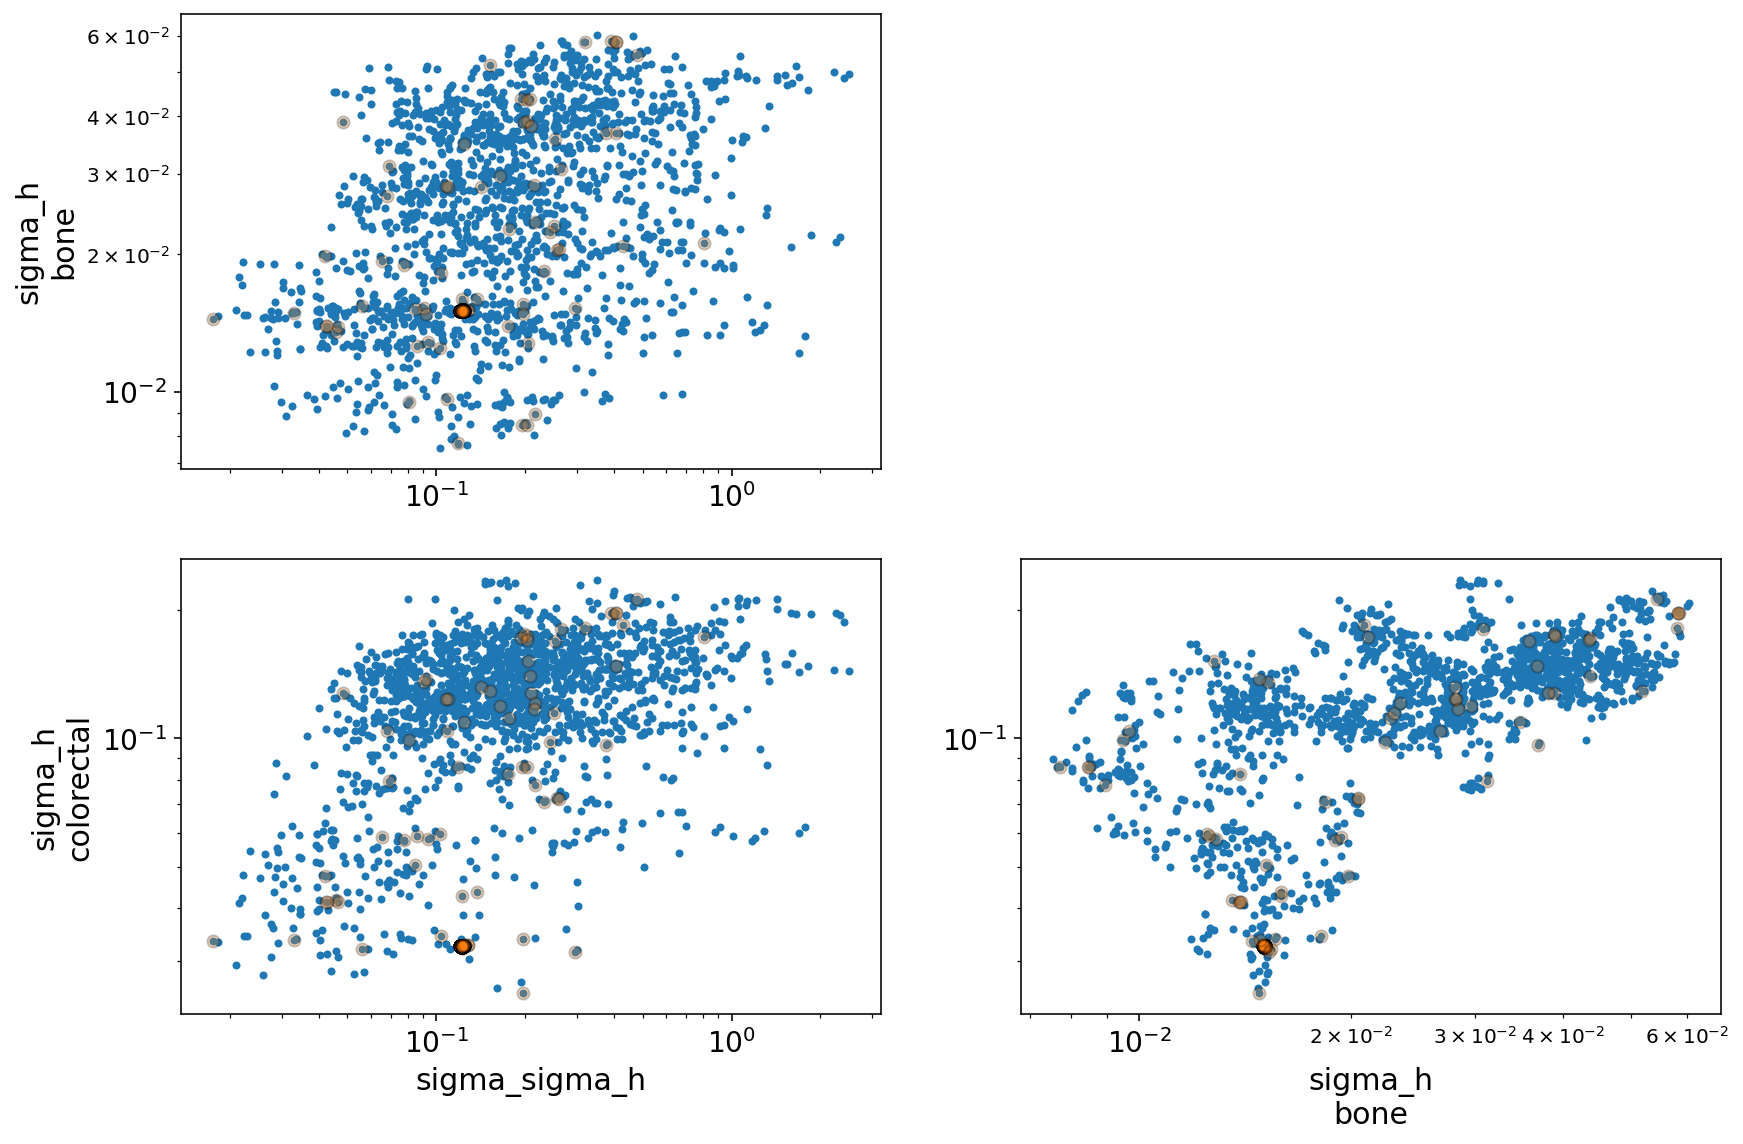

In [29]:
axes = az.plot_pair(
    sp8_mcmc_post,
    var_names=["sigma_sigma_h", "sigma_h"],
    divergences=True,
    divergences_kwargs={"alpha": 0.25},
)
for ax in axes.flatten():
    ax.set_xscale("log")
    ax.set_yscale("log")
plt.show()

---

In [20]:
notebook_toc = time()
print(f"execution time: {(notebook_toc - notebook_tic) / 60:.2f} minutes")

execution time: 27.32 minutes


In [21]:
%load_ext watermark
%watermark -d -u -v -iv -b -h -m

Last updated: 2021-10-15

Python implementation: CPython
Python version       : 3.9.6
IPython version      : 7.26.0

Compiler    : Clang 11.1.0 
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit

Hostname: JHCookMac.local

Git branch: speclet-eight

arviz     : 0.11.2
pandas    : 1.3.2
plotnine  : 0.8.0
numpy     : 1.21.2
matplotlib: 3.4.3
sys       : 3.9.6 | packaged by conda-forge | (default, Jul 11 2021, 03:36:15) 
[Clang 11.1.0 ]
logging   : 0.5.1.2
pymc3     : 3.11.2
seaborn   : 0.11.2

